# Deep Neural Network (Feedforward NN, Multi-layers Perceptron)

## DNN 모델로 1차원 x & y 변수 (sin 함수) 모델링 하기 

### Step 1. 데이터 생성

이번에는 조금 다르게 y=sin(x)를 따르는 데이터를 임의로 생성한 후,

Deep Neural Network 모델을 통해 위의 데이터에 가장 적합한 파라미터인 뉴럴 네트워크의 Weights를 찾는 예제 입니다.

이전 예제와 크게 달라진 점은 없고, 생성한 데이터가 sin 함수를 따른다는 것만 차이가 있습니다.

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


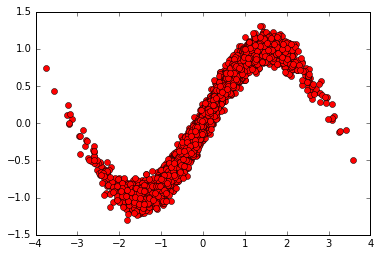

In [1]:
import numpy as np
from data_functions import *

num_points = 5000
vectors_set = []
for i in range(num_points):
    x1=np.random.normal(.0, 1.0)
    y1=np.sin(x1) + np.random.normal(0.,0.1)
    vectors_set.append([x1,y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.legend()
plt.show()

### Step 2. 모델 구축

TF를 이용한 구현의 전반적인 프로세스는 모두 동일합니다.
두 번째 단계는 우리가 사용할 Deep Neural Network 모델을 생성하는 것입니다.

우선, 주의할 점이 하나 있습니다!
DNN 계산은 기본적으로 행렬의 곱셈(matmul)을 이용하여 진행됩니다.

하지만 위에서 우리가 생성한 데이터는 rank=1인 리스트입니다.
아래를 먼저 볼까요?

In [2]:
print np.shape(x_data), np.rank(x_data)

(5000,) 1


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


행렬의 곱셈을 이용하여 계산을 할 경우 기본적으로, 2차원 이상의 Tensor 형태여야 합니다.
(2차원 이상의 행렬이라고 이해합시다.)

행과 열의 개수가 정확하게 결정되어야, 행렬의 곱셈의 결과값의 크기 역시 결정될 수 있겠죠?

반면, 위의 예는 현재 데이터의 모양이 (5000,)으로 열의 크기가 정해지지 않았습니다.

우선 이 데이터를 2차원으로 바꾸어주겠습니다.

2차원으로 바꾸는 방법은 tf.reshape을 이용하여 직접 모양을 결정하는 방법과

tf.expand_dims를 통해 특정 축을 기준으로 차원을 증가시키는 방법이 있습니다.

주의할 점은 tf 연산을 사용할 경우, 리턴되는 결과 역시 tensorflow의 자료형인 Tensor 자료형이라는 점입니다!

In [3]:
import tensorflow as tf
_x_data = tf.reshape(x_data, [len(x_data),1])
__x_data = tf.expand_dims(x_data,1)
print _x_data
print __x_data

Tensor("Reshape:0", shape=(5000, 1), dtype=float32)
Tensor("ExpandDims:0", shape=(5000, 1), dtype=float32)



본격적으로 Neural Network를 구현해보겠습니다.

우리의 목표는 input(1)-hidden1(5)-hidden2(3)-output(1) 구조의

2개의 hidden layer를 갖는 Deep Neural Network를 구축하는 것입니다.

Neural Network의 구현은 매우 간단한데, tf.Variable을 통해 각 레이어 사이의 Weight Matrix를 선언해주고,

각 Layer의 계산 결과는 이전 Layer와 해당하는 Weight Matrix 사이의 행렬의 곱. 

그리고 Activation 두 단계로 구성된다는 점입니다.


여기에서 학습의 대상은 Weight 들이니, W1, W2, W_out을 각각 [1,5], [5,3], [3,1] 모양의

tf.Variable로 선언하여 모델을 구축해봅시다.

초기값은 -1.0과 1.0 사이의 random uniform으로 설정하겠습니다.

loss, optimizer train 등의 설정은 이전 예제와 완전히 동일합니다!

In [5]:
import tensorflow as tf
x_data = np.expand_dims(x_data,1)
y_data = np.expand_dims(y_data,1)

input_data = tf.placeholder(tf.float32, shape=[None,1])
output_data = tf.placeholder(tf.float32, shape=[None,1])

W1 = tf.Variable(tf.random_uniform([1,5], -1.0, 1.0))
print W1
W2 = tf.Variable(tf.random_uniform([5,3], -1.0, 1.0))
W_out = tf.Variable(tf.random_uniform([3,1], -1.0, 1.0))

hidden1 = tf.nn.sigmoid(tf.matmul(input_data,W1))
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W2))
output = tf.matmul(hidden2, W_out)

loss = tf.reduce_mean(tf.square(output-output_data))

global_step = tf.Variable(0, trainable=False)

optimizer = tf.train.AdamOptimizer(0.5)
train = optimizer.minimize(loss, global_step = global_step)

init = tf.global_variables_initializer()

sess= tf.Session()
sess.run(init)

Tensor("Model/Variable/read:0", shape=(1, 5), dtype=float32)


In [ ]:
writer = tf.summary.FileWriter('./mini_graph',sess.graph)

tf.summary.scalar('loss', loss)
tf.summary.histogram('histogram_loss', loss)
summary_op = tf.summary.merge_all()

In [ ]:
#Train several steps
'''
for step in range(100):
    sess.run(train)
    print("Step, Loss Value")
    print(step, sess.run(loss))
'''

### Mini-batch Learning

이번에는 위의 학습 방식과 같이 Full-batch Learning을 사용하지 않고, 

mini-batch learning 방식을 사용해서 학습을 해보겠습니다.

mini-batch learning은 우리가 가지고 있는 데이터를 BATCH_SIZE 크기를 갖는 여러 데이터(batch) 셋으로 분할한 후,

분할한 batch를 단위로 파라미터를 1회 업데이트 하는 방식을 의미합니다.

mini-batch learning을 이용할 경우, 1회 업데이트에 사용하는 계산량을 줄일 수 있습니다.

또한, full-batch learning은 매 회 학습 시에 같은 데이터를 이용하여 학습하게 되지만,

mini-batch learning의 경우 매 회 다양한 데이터를 이용해 좀 더 일반화된 학습을 가능할 수 있다는 장점이 있습니다.

In [ ]:
BATCH_SIZE = 100
BATCH_NUM = int(len(x_data)/BATCH_SIZE)

for step in range(500):
    index = 0
    x_data, y_data = shuffle_data(x_data, y_data)
    for batch_iter in range(BATCH_NUM-1):
        feed_dict = {input_data: x_data[index:index+BATCH_SIZE], 
                     output_data: y_data[index:index+BATCH_SIZE]}
        _, summary = sess.run([train, summary_op], feed_dict = feed_dict)
        writer.add_summary(summary, global_step=index)
        print("Step, Loss Value")
        print(step, sess.run(loss, feed_dict = feed_dict))
        index += BATCH_SIZE

In [ ]:
plt.plot(x_data[:], y_data[:], 'ro')
plt.plot(x_data[:], sess.run(output, feed_dict={input_data: x_data})[:], 'bo')
plt.xlabel('x')
plt.xlim(-4,3)
plt.ylabel('y')
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

In [ ]:
!tensorboard --logdir='./mini_graph'